In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
data = mnist.load_data()

In [4]:
from tensorflow.keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [6]:
model = Sequential()

In [7]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='valid', input_shape = (28, 28, 1)))

In [8]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding = 'valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
Total params: 18816 (73.50 KB)
Trainable params: 18816 (73.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.add(Flatten())

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
Total params: 18816 (73.50 KB)
Trainable params: 18816 (

In [12]:
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 31s 20ms/step - loss: 0.1607 - accuracy: 0.9504 - val_loss: 0.0711 - val_accuracy: 0.9784
Epoch 2/5
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0504 - accuracy: 0.9836 - val_loss: 0.0509 - val_accuracy: 0.9847
Epoch 3/5
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0340 - accuracy: 0.9889 - val_loss: 0.0603 - val_accuracy: 0.9822
Epoch 4/5
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0249 - accuracy: 0.9919 - val_loss: 0.0436 - val_accuracy: 0.9886
Epoch 5/5
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0192 - accuracy: 0.9937 - val_loss: 0.0390 - val_accuracy: 0.9883


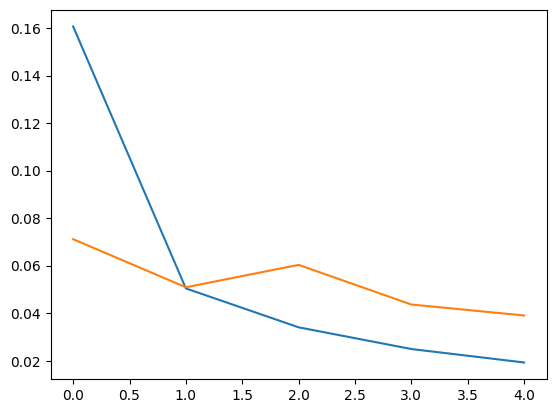

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

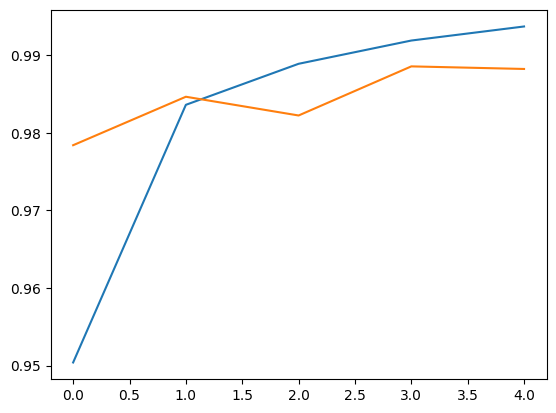

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [17]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)